# Import python packages

In [1]:
import os
SRC_PATH = '../src/'
os.chdir(SRC_PATH)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

SEED = 7
np.random.seed(SEED)

# Define parameters and load dataset

In [3]:
LABELS = 'geo' # choose between 'geo', 'owner', 'vf and 'combined'
DATA_TYPE = 'countries' # choose between 'lats_longs' and 'countries'

LOAD_TRAINING = False

In [4]:
MODEL_NAME = DATA_TYPE + '_' + LABELS + '_classification_evaluation_comparison'

ipsource_dict = {1: 'M', 2: 'R', 3: 'A', 4: 'X', 0: "pad"}
SOURCES_NUM = len(ipsource_dict) + 1
label_dict = {0: 'G', 1: 'R',2: 'Unknown'}
class_names = ["GREEN", "RED"]

DATA_PATH = '../data/'
MODELS_PATH = '../models/'
RESULTS_PATH = '../results/'

path_prefix = RESULTS_PATH + MODEL_NAME

if LOAD_TRAINING:
    training = pd.read_pickle("../data/dataset_b_noisy_7_agents_training.pkl") 
    print(len(training))
test_comb = pd.read_pickle("../data/dataset_b_noisy_7_agents_test.pkl") 
print(len(test_comb))

2802801 702383


In [5]:
test_comb.head()

,srcAS,destAS,srcCC,destCC,num_hops,lat,long,IPsource,geoCC,ASN,vf,combined,geo,owner
trid,,,,,,,,,,,,,,
1328731,14061,42999,US,TR,10,"[50.115520000000004, 50.115520000000004, 50.11...","[8.68417, 8.68417, 8.68417, 8.67185, 9.491, 8....","[1, 2, 1, 1, 3, 1, 3, 3, 2, 3]","[DE, DE, DE, DE, DE, DE, TR, TR, TR, TR]","[14061, 14061, 2914, 2914, 2914, 9121, 9121, 9...",0,0,0,0
5183622,138062,3605,ID,GU,1,[22.285521],[114.1577],[1],[HK],[24482],0,0,0,0
3258755,14061,24173,US,VN,10,"[40.714271999999994, 40.714271999999994, 40.71...","[-74.005966, -74.005966, -74.005997, -122.3320...","[1, 1, 1, 1, 1, 1, 1, 3, 3, 3]","[US, US, US, US, JP, HK, HK, HK, VN, VN]","[14061, 14061, 2914, 2914, 2914, 2914, 2914, 2...",0,0,0,0
2660757,16276,7171,FR,US,13,"[0.0, 0.0, 0.0, 0.0, 1.28967, 43.296669, 48.86...","[0.0, 0.0, 0.0, 0.0, 103.850098, 5.37639, 2.34...","[4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[nan, nan, nan, nan, SG, FR, FR, FR, FR, US, U...","[0, 0, 0, 0, 16276, 16276, 16276, 6461, 6461, ...",0,0,0,0
1730541,20473,12479,US,ES,7,"[48.860001000000004, 48.860001000000004, 48.86...","[2.34444, 2.34444, 2.34444, 5.381069999999999,...","[1, 1, 1, 2, 1, 1, 1]","[FR, FR, FR, FR, ES, ES, ES]","[3257, 3257, 3257, 5511, 5511, 5511, 5511]",0,0,0,0


In [6]:
if LOAD_TRAINING:
    print(training[LABELS].value_counts())
    print(training[LABELS].value_counts(normalize=True))

0    2710641
1      86408
2       5752
Name: geo, dtype: int64
0    0.967119
1    0.030829
2    0.002052
Name: geo, dtype: float64


In [7]:
print(test_comb[LABELS].value_counts())
print(test_comb[LABELS].value_counts(normalize=True))

0    679078
1     21788
2      1517
Name: geo, dtype: int64
0    0.96682
1    0.03102
2    0.00216
Name: geo, dtype: float64


In [8]:
max_len = max(len(raw) for raw in test_comb['lat'].values)
max_len = max(max_len, 40)
print(max_len)

40


## Process data

In [9]:
from data_utils import *

if LOAD_TRAINING:
    training = generate_dataset_and_meta(training, data_type=DATA_TYPE, max_len=max_len)
    print(len(training))

test_comb = generate_dataset_and_meta(test_comb, data_type=DATA_TYPE, max_len=max_len)
print(len(test_comb))

Using TensorFlow backend.
C:\Users\tals\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\tals\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\tals\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\tals\AppData\Roaming

2802801
702383


In [10]:
test_comb.head()

,srcAS,destAS,srcCC,destCC,num_hops,lat,long,geoCC,ASN,vf,combined,geo,owner,sources,countries
trid,,,,,,,,,,,,,,,
1328731,14061,42999,US,TR,10,"[50.115520000000004, 50.115520000000004, 50.11...","[8.68417, 8.68417, 8.68417, 8.67185, 9.491, 8....","[DE, DE, DE, DE, DE, DE, TR, TR, TR, TR]","[14061, 14061, 2914, 2914, 2914, 9121, 9121, 9...",0,0,0,0,"[1, 2, 1, 1, 3, 1, 3, 3, 2, 3, 0, 0, 0, 0, 0, ...","[DE, DE, DE, DE, DE, DE, TR, TR, TR, TR, , , ,..."
5183622,138062,3605,ID,GU,1,[22.285521],[114.1577],[HK],[24482],0,0,0,0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[HK, , , , , , , , , , , , , , , , , , , , , ,..."
3258755,14061,24173,US,VN,10,"[40.714271999999994, 40.714271999999994, 40.71...","[-74.005966, -74.005966, -74.005997, -122.3320...","[US, US, US, US, JP, HK, HK, HK, VN, VN]","[14061, 14061, 2914, 2914, 2914, 2914, 2914, 2...",0,0,0,0,"[1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 0, 0, 0, 0, 0, ...","[US, US, US, US, JP, HK, HK, HK, VN, VN, , , ,..."
2660757,16276,7171,FR,US,13,"[0.0, 0.0, 0.0, 0.0, 1.28967, 43.296669, 48.86...","[0.0, 0.0, 0.0, 0.0, 103.850098, 5.37639, 2.34...","[nan, nan, nan, nan, SG, FR, FR, FR, FR, US, U...","[0, 0, 0, 0, 16276, 16276, 16276, 6461, 6461, ...",0,0,0,0,"[4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, ...","[-, -, -, -, SG, FR, FR, FR, FR, US, US, US, U..."
1730541,20473,12479,US,ES,7,"[48.860001000000004, 48.860001000000004, 48.86...","[2.34444, 2.34444, 2.34444, 5.381069999999999,...","[FR, FR, FR, FR, ES, ES, ES]","[3257, 3257, 3257, 5511, 5511, 5511, 5511]",0,0,0,0,"[1, 1, 1, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[FR, FR, FR, FR, ES, ES, ES, , , , , , , , , ,..."


# Map Countries & Define Embedding Parameters

In [30]:
import pickle
import os.path

if DATA_TYPE == "countries":
    country_idx = pickle.load(open(DATA_PATH + 'country_idx.pkl', 'rb'))
    total_countries = len(country_idx)
    print(total_countries)
    embedding_vecor_length = 32
else:
    total_countries = None
    country_idx = None
    embedding_vecor_length = 32

240


# Generate training and test sets

In [12]:
if DATA_TYPE == "lats_longs":
    input_shape = np.array(test_comb["lats_longs"].values[0]).shape
else:
    input_shape = np.array(test_comb["countries"].values[0]).shape
print(input_shape)

(40,)


## Create np arrays

### Remove UNDECIDED by chosen label

In [13]:
print(len(test_comb))

test = test_comb[test_comb[LABELS] < 2]
print(len(test))

if LOAD_TRAINING:
    training = training[training[LABELS] < 2]
    print(len(training))

702383
700866
2797049


### Generate np arrays for test_comb (evaluation on the 'label_comb'), training and test sets

In [14]:
x_test_comb, u_test_comb, y_test_comb = generate_set_arrays(test_comb, max_len, DATA_TYPE, 'combined', country_idx)
print(x_test_comb.shape, u_test_comb.shape, y_test_comb.shape)

(702383, 40) (702383, 40) (702383,)


In [15]:
if LOAD_TRAINING:
    x_training, u_training, y_training = generate_set_arrays(training, max_len, DATA_TYPE, LABELS, country_idx)
    print(x_training.shape, u_training.shape, y_training.shape)

(2797049, 40) (2797049, 40) (2797049,)


In [16]:
x_test, u_test, y_test = generate_set_arrays(test, max_len, DATA_TYPE, LABELS, country_idx)
print(x_test.shape, u_test.shape, y_test.shape)

(700866, 40) (700866, 40) (700866,)


In [17]:
print(np.unique(u_test))

[0 1 2 3 4]


# Load models

In [25]:
from attention_models import generate_model

# def load_model(attention_name):
#     model_name = DATA_TYPE + '_' + LABELS + '_classification_' + attention_name + '_SimpleNet'
#     with open(MODELS_PATH + model_name + '.json', 'r') as f:
#         loaded_model =  model_from_json(f.read())
#     loaded_model.load_weights(MODELS_PATH + model_name + '_acc.hdf5')
#     print("Successfully loaded", attention_name, "model from disk")
#     return loaded_model

def load_model(ATTENTION_NAME):
    if ATTENTION_NAME == "SDPA":
        USE_SOURCES = False
    else:
        USE_SOURCES = True
        
    model = generate_model(input_shape, ATTENTION_NAME, USE_SOURCES, USE_EMBEDDING, num_categories=total_countries,
                       embedding_vecor_length=embedding_vecor_length, attention_first=ATTENTION_FIRST,
                       blstm=BLSTM, no_lstm=NO_LSTM)
    model_name = DATA_TYPE + '_' + LABELS + '_classification_' + ATTENTION_NAME + '_SimpleNet'
    model.load_weights(MODELS_PATH + model_name + '_acc.hdf5')
    print("Successfully loaded", ATTENTION_NAME, "model from disk")
    return model


if DATA_TYPE == "lats_longs":
    USE_EMBEDDING = False
else:
    USE_EMBEDDING = True

ATTENTION_FIRST = True
BLSTM = True
NO_LSTM = False

model_sdpa = load_model('SDPA')
model_sasa = load_model('SASA')
model_sdpa_qs_ks = load_model('SDPA_QS_KS')

Successfully loaded SDPA model from disk
Successfully loaded SASA model from disk
Successfully loaded SDPA_QS_KS model from disk


# Evaluation

## Evaluate accuracy over the test set

In [26]:
from model_utils import *
val_batch_size = 1024

y_test_prediction_sdpa, y_test_prob_sdpa = get_model_pred_prob(model_sdpa, x_test, u_test, val_batch_size, False)
print(len(y_test_prediction_sdpa), len(y_test))

y_test_prediction_sasa, y_test_prob_sasa = get_model_pred_prob(model_sasa, x_test, u_test, val_batch_size, True)
print(len(y_test_prediction_sasa), len(y_test))

y_test_prediction_sdpa_qs_ks, y_test_prob_sdpa_qs_ks = get_model_pred_prob(model_sdpa_qs_ks, x_test, u_test, val_batch_size, True)
print(len(y_test_prediction_sdpa_qs_ks), len(y_test))

700866/700866 [==============================] - 273s 389us/step
700866 700866
700866/700866 [==============================] - 283s 404us/step
700866 700866
700866/700866 [==============================] - 287s 409us/step
700866 700866


In [31]:
from evaluation_utils import print_evaluation_metrics, plot_roc_curve_multiple

ATTENTION_NAME = "SDPA"
print("### Evaluation metrics for", ATTENTION_NAME, ": ###")
print_evaluation_metrics(y_test, y_test_prediction_sdpa, y_test_prob_sdpa, ATTENTION_NAME)

ATTENTION_NAME = "SASA"
print("### Evaluation metrics for", ATTENTION_NAME, ": ###")
print_evaluation_metrics(y_test, y_test_prediction_sasa, y_test_prob_sasa, ATTENTION_NAME)

ATTENTION_NAME = "SDPA_QS_KS"
print("### Evaluation metrics for", ATTENTION_NAME, ": ###")
print_evaluation_metrics(y_test, y_test_prediction_sdpa_qs_ks, y_test_prob_sdpa_qs_ks, ATTENTION_NAME)

### Evaluation metrics for SDPA : ###
accuracy_score for SDPA 0.8217961778713763
FA for SDPA 0.17738757550679007
Detection rate i.e. recall_score for SDPA 0.7963557921791812
AUC for SDPA 0.8970961755673893
TPR@FPR=0.001 for SDPA (0.0009984125534916461, 0.09569487791444832)
TPR@FPR=0.01 for SDPA (0.009998851383788018, 0.28873691940517715)
TPR@FPR=0.1 for SDPA (0.09999145900765449, 0.6757389388654305)
### Evaluation metrics for SASA : ###
accuracy_score for SASA 0.8617738626213856
FA for SASA 0.1373421020854747
Detection rate i.e. recall_score for SASA 0.8342206719295024
AUC for SASA 0.9283901359401748
TPR@FPR=0.001 for SASA (0.0009984125534916461, 0.08500091793647879)
TPR@FPR=0.01 for SASA (0.009998851383788018, 0.4142188360565449)
TPR@FPR=0.1 for SASA (0.09999293159254165, 0.7914448320176244)
### Evaluation metrics for SDPA_QS_KS : ###
accuracy_score for SDPA_QS_KS 0.8762416781524571
FA for SDPA_QS_KS 0.11643875961229788
Detection rate i.e. recall_score for SDPA_QS_KS 0.648109050853681

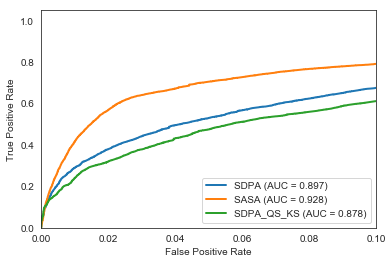

In [32]:
plot_roc_curve_multiple(y_test, [y_test_prob_sdpa, y_test_prob_sasa, y_test_prob_sdpa_qs_ks], path_prefix,
                        ["SDPA", "SASA", "SDPA_QS_KS"], max_fp=0.1)

### Over test_comb - based on 'combined' labels

In [33]:
y_test_comb_prediction_sdpa, y_test_comb_prob_sdpa = get_model_pred_prob(model_sdpa, x_test_comb, u_test_comb, val_batch_size, False)
print(len(y_test_comb_prediction_sdpa), len(y_test_comb))

y_test_comb_prediction_sasa, y_test_comb_prob_sasa = get_model_pred_prob(model_sasa, x_test_comb, u_test_comb, val_batch_size, True)
print(len(y_test_comb_prediction_sasa), len(y_test_comb))

y_test_comb_prediction_sdpa_qs_ks, y_test_comb_prob_sdpa_qs_ks = get_model_pred_prob(model_sdpa_qs_ks, x_test_comb, u_test_comb, val_batch_size, True)
print(len(y_test_comb_prediction_sdpa_qs_ks), len(y_test_comb))

702383/702383 [==============================] - 272s 387us/step
702383 702383
702383/702383 [==============================] - 282s 402us/step
702383 702383
702383/702383 [==============================] - 283s 403us/step
702383 702383


In [34]:
ATTENTION_NAME = "SDPA"
print("### Evaluation metrics for", ATTENTION_NAME, ": ###")
print_evaluation_metrics(y_test_comb, y_test_comb_prediction_sdpa, y_test_comb_prob_sdpa, ATTENTION_NAME)

ATTENTION_NAME = "SASA"
print("### Evaluation metrics for", ATTENTION_NAME, ": ###")
print_evaluation_metrics(y_test_comb, y_test_comb_prediction_sasa, y_test_comb_prob_sasa, ATTENTION_NAME)

ATTENTION_NAME = "SDPA_QS_KS"
print("### Evaluation metrics for", ATTENTION_NAME, ": ###")
print_evaluation_metrics(y_test_comb, y_test_comb_prediction_sdpa_qs_ks, y_test_comb_prob_sdpa_qs_ks, ATTENTION_NAME)

### Evaluation metrics for SDPA : ###
accuracy_score for SDPA 0.8150624374450977
FA for SDPA 0.1754024863966709
Detection rate i.e. recall_score for SDPA 0.6296145335972982
AUC for SDPA 0.8107027763793607
TPR@FPR=0.001 for SDPA (0.0009984506799793425, 0.07354139979038081)
TPR@FPR=0.01 for SDPA (0.009999476075355333, 0.2039420053569349)
TPR@FPR=0.1 for SDPA (0.09999176689844096, 0.5126062652847327)
### Evaluation metrics for SASA : ###
accuracy_score for SASA 0.851840092940746
FA for SASA 0.13635662802098691
Detection rate i.e. recall_score for SASA 0.6222778618842436
AUC for SASA 0.8228040839562147
TPR@FPR=0.001 for SASA (0.0009999476075355333, 0.07965529288459298)
TPR@FPR=0.01 for SASA (0.009991991437574378, 0.30304530103645044)
TPR@FPR=0.1 for SASA (0.09999625768110952, 0.5828869220915337)
### Evaluation metrics for SDPA_QS_KS : ###
accuracy_score for SDPA_QS_KS 0.8675722504673377
FA for SDPA_QS_KS 0.11416467700045652
Detection rate i.e. recall_score for SDPA_QS_KS 0.5123733550716199

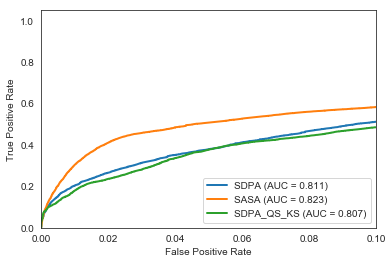

In [35]:
plot_roc_curve_multiple(y_test_comb, [y_test_comb_prob_sdpa, y_test_comb_prob_sasa, y_test_comb_prob_sdpa_qs_ks], path_prefix + '_comb',
                        ["SDPA", "SASA", "SDPA_QS_KS"], max_fp=0.1)